In [4]:
import xarray as xr
from pyxpcm import pcm

In [3]:
print(pcm)

<class 'pyxpcm.models.pcm'>


In [2]:
import src.constants as cst

platform linux


In [3]:
cst.BSOSE_PATH

'/gws/nopw/j04/ai4er/users/sdat2/bsose_data/bsose_stuv'

In [18]:
salt = xr.open_dataset(cst.SALT_FILE)
print(salt)

<xarray.Dataset>
Dimensions:  (XC: 2160, YC: 588, Z: 52, time: 60)
Coordinates:
    iter     (time) int64 ...
  * time     (time) datetime64[ns] 2008-01-31T10:24:00 ... 2012-12-31
  * XC       (XC) float32 0.08333 0.25 0.4167 0.5833 ... 359.4 359.6 359.8 359.9
  * YC       (YC) float32 -77.98 -77.95 -77.91 -77.88 ... -30.02 -29.87 -29.72
  * Z        (Z) float32 -2.1 -6.7 -12.15 -18.55 ... -5e+03 -5.4e+03 -5.8e+03
    Depth    (YC, XC) float32 ...
    rA       (YC, XC) float32 ...
    drF      (Z) float32 ...
    hFacC    (Z, YC, XC) float32 ...
Data variables:
    SALT     (time, Z, YC, XC) float32 ...


In [12]:
theta = xr.open_dataset(cst.THETA_FILE)
print(theta)

<xarray.Dataset>
Dimensions:  (XC: 2160, YC: 588, Z: 52, time: 60)
Coordinates:
    iter     (time) int64 ...
  * time     (time) datetime64[ns] 2008-01-31T10:24:00 ... 2012-12-31
  * XC       (XC) float32 0.08333 0.25 0.4167 0.5833 ... 359.4 359.6 359.8 359.9
  * YC       (YC) float32 -77.98 -77.95 -77.91 -77.88 ... -30.02 -29.87 -29.72
  * Z        (Z) float32 -2.1 -6.7 -12.15 -18.55 ... -5e+03 -5.4e+03 -5.8e+03
    Depth    (YC, XC) float32 ...
    rA       (YC, XC) float32 ...
    drF      (Z) float32 ...
    hFacC    (Z, YC, XC) float32 ...
Data variables:
    THETA    (time, Z, YC, XC) float32 ...


In [50]:
theta_sel = (
    theta.sel(Z=slice(-cst.MIN_DEPTH, -cst.MAX_DEPTH))
    .where(theta.coords[cst.DEPTH_NAME] > cst.MAX_DEPTH)
    .drop(cst.USELESS_LIST)
    .THETA.rename("ALL")
    .drop(["Z"])
)
salt_sel = (
    salt.sel(Z=slice(-cst.MIN_DEPTH, -cst.MAX_DEPTH))
    .where(salt.coords[cst.DEPTH_NAME] > cst.MAX_DEPTH)
    .drop(cst.USELESS_LIST)
    .SALT.rename("ALL")
    .drop(["Z"])
)

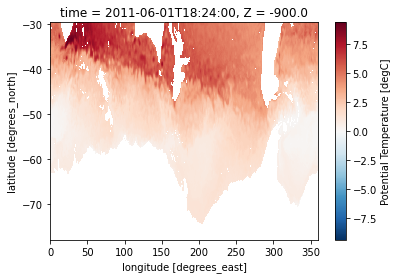

In [48]:
theta_sel.isel(time=cst.EXAMPLE_TIME_INDEX, Z=10).plot.imshow()

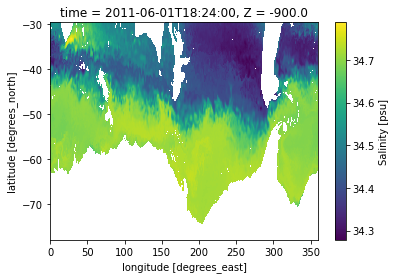

In [49]:
salt_sel.isel(time=cst.EXAMPLE_TIME_INDEX, Z=10).plot.imshow()

In [55]:
xr_all = xr.concat([salt_sel, theta_sel], "Z")

In [56]:
xr_all

<xarray.DataArray 'ALL' (time: 60, Z: 34, YC: 588, XC: 2160)>
array([[[[       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         ...,
         [35.268375 , 35.26409  , 35.25704  , ..., 35.27357  ,
          35.273254 , 35.271984 ],
         [35.269543 , 35.270298 , 35.270508 , ..., 35.25641  ,
          35.261433 , 35.266228 ],
         [35.267864 , 35.27093  , 35.273327 , ..., 35.25193  ,
          35.256367 , 35.261852 ]],

        [[       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
...
         [ 2.8248577,  2.8272774,  2.833367 , ...,  2.8305717,
           2.8242388,  2.8232625],
         [ 2.8322103,  2.83259  ,  2.8353095, ...,  2.8530562,
           2.8429518,  2.8360739],
         [ 2.8575041,  2.8491707,  2.8445358, ...,  2.8957305,
           2.8820524,  2.869494 ]],

        [[       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         ...,
         [ 2.61289  ,  2.6148174,  2.6240363, ...,  2.6284435,
           2.6199777,  2.6143694],
         [ 2.6240263,  2.6206272,  2.6228156, ...,  2.6507902,
           2.6402566,  2.6315606],
         [ 2.654041 ,  2.6435902,  2.6378205, ...,  2.688515 ,
           2.6763215,  2.6652503]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2008-01-31T10:24:00 ... 2012-12-31
  * XC       (XC) float32 0.08333 0.25 0.4167 0.5833 ... 359.4 359.6 359.8 359.9
  * YC       (YC) float32 -77.98 -77.95 -77.91 -77.88 ... -30.02 -29.87 -29.72
Dimensions without coordinates: Z
Attributes:
    units:          psu
    long_name:      Salinity
    standard_name:  SALT

In [57]:
from pyxpcm import pcm

In [62]:
pcm_object = pcm(
        K=5,
        features={"ALL": np.array(list(range(15)))},
        # separate_pca=separate_pca,
        maxvar=3,
        timeit=True,
        timeit_verb=1,
    )

In [64]:
 z = np.arange(-cst.MIN_DEPTH, -cst.MAX_DEPTH, -10.0)

In [65]:
z

array([ -300.,  -310.,  -320.,  -330.,  -340.,  -350.,  -360.,  -370.,
        -380.,  -390.,  -400.,  -410.,  -420.,  -430.,  -440.,  -450.,
        -460.,  -470.,  -480.,  -490.,  -500.,  -510.,  -520.,  -530.,
        -540.,  -550.,  -560.,  -570.,  -580.,  -590.,  -600.,  -610.,
        -620.,  -630.,  -640.,  -650.,  -660.,  -670.,  -680.,  -690.,
        -700.,  -710.,  -720.,  -730.,  -740.,  -750.,  -760.,  -770.,
        -780.,  -790.,  -800.,  -810.,  -820.,  -830.,  -840.,  -850.,
        -860.,  -870.,  -880.,  -890.,  -900.,  -910.,  -920.,  -930.,
        -940.,  -950.,  -960.,  -970.,  -980.,  -990., -1000., -1010.,
       -1020., -1030., -1040., -1050., -1060., -1070., -1080., -1090.,
       -1100., -1110., -1120., -1130., -1140., -1150., -1160., -1170.,
       -1180., -1190., -1200., -1210., -1220., -1230., -1240., -1250.,
       -1260., -1270., -1280., -1290., -1300., -1310., -1320., -1330.,
       -1340., -1350., -1360., -1370., -1380., -1390., -1400., -1410.,
      